# Выполните визуализацию данных с использованием библиотеки Pandas. 

##Импорт библиотек

In [ ]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

##Загрузка файла Малдовских машин


In [ ]:
uploaded = files.upload()

## Инициализация машин


In [35]:
df = pd.read_csv('/content/cars_moldova.csv', delimiter = ',')
df

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2      Volkswagen          Golf  1998  Hatchback       1.0   
3         Renault        Laguna  2012  Universal  110000.0   
4            Opel         Astra  2006  Universal  200000.0   
...           ...           ...   ...        ...       ...   
41002       Dacia     Logan Mcv  2015  Universal   89000.0   
41003     Renault         Modus  2009  Hatchback     225.0   
41004    Mercedes       E Class  2016      Sedan   50000.0   
41005       Mazda             6  2006      Combi  370000.0   
41006     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
0                    1800.0        Hybrid    Automatic       7750.0  
1                    1500.0        Diesel       Manual       8550.0  
2                    1400.0        Petrol       Manual       2200.0  
3                    1500.0        Diesel       Manual       6550.0  
4                    1600.0  Metan/Propan       Manual       4100.0  
...                     ...           ...          ...          ...  
41002                1500.0        Diesel       Manual       7000.0  
41003                1500.0        Diesel       Manual       4500.0  
41004                1950.0        Diesel    Automatic      29500.0  
41005                2000.0        Diesel       Manual       4000.0  
41006                1500.0        Diesel       Manual       4000.0  

[41007 rows x 9 columns]

## Удаление дубликатов

In [ ]:
DF = df.drop_duplicates()

DF = DF.reset_index(drop=True)

DF

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2      Volkswagen          Golf  1998  Hatchback       1.0   
3         Renault        Laguna  2012  Universal  110000.0   
4            Opel         Astra  2006  Universal  200000.0   
...           ...           ...   ...        ...       ...   
37259  Land Rover    Freelander  2002  Crossover  225000.0   
37260       Dacia     Logan Mcv  2015  Universal   89000.0   
37261     Renault         Modus  2009  Hatchback     225.0   
37262       Mazda             6  2006      Combi  370000.0   
37263     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
0                    1800.0        Hybrid    Automatic       7750.0  
1                    1500.0        Diesel       Manual       8550.0  
2                    1400.0        Petrol       Manual       2200.0  
3                    1500.0        Diesel       Manual       6550.0  
4                    1600.0  Metan/Propan       Manual       4100.0  
...                     ...           ...          ...          ...  
37259                1800.0  Metan/Propan       Manual       4400.0  
37260                1500.0        Diesel       Manual       7000.0  
37261                1500.0        Diesel       Manual       4500.0  
37262                2000.0        Diesel       Manual       4000.0  
37263                1500.0        Diesel       Manual       4000.0  

[37264 rows x 9 columns]

## Валидация списка

In [ ]:
# здравый смысл
question_dist = DF[(df.Year <2021) & (DF.Distance < 1100)]
DF = DF.drop(question_dist.index)

# анализ гистограмм
question_dist = DF[(DF.Distance > 1e6)]
DF = DF.drop(question_dist.index)

# здравый смысл
question_engine = DF[DF["Engine_capacity(cm3)"] < 200]
DF = DF.drop(question_engine.index)

# здравый смысл
question_engine = DF[DF["Engine_capacity(cm3)"] > 5000]
DF = DF.drop(question_engine.index)

# здравый смысл
question_price = DF[(DF["Price(euro)"] < 101)]
DF = DF.drop(question_price.index)

# анализ гистограмм
question_price = DF[DF["Price(euro)"] > 1e5]
DF = DF.drop(question_price.index)

#анализ гистограмм
question_year = DF[DF.Year < 1971]
DF = DF.drop(question_year.index)

DF = DF.reset_index(drop=True)
DF.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Make         Model  Year      Style  Distance  \
32516  Volkswagen        Passat  2016      Sedan   88000.0   
32517  Land Rover    Freelander  2002  Crossover  225000.0   
32518       Dacia     Logan Mcv  2015  Universal   89000.0   
32519       Mazda             6  2006      Combi  370000.0   
32520     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
32516                1800.0        Petrol    Automatic      11500.0  
32517                1800.0  Metan/Propan       Manual       4400.0  
32518                1500.0        Diesel       Manual       7000.0  
32519                2000.0        Diesel       Manual       4000.0  
32520                1500.0        Diesel       Manual       4000.0

## Определение числовых и строковых значений

In [ ]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столблцов =  4


## Создание графиков(гистограмма)

0 Year
1 Distance
2 Engine_capacity(cm3)
3 Price(euro)


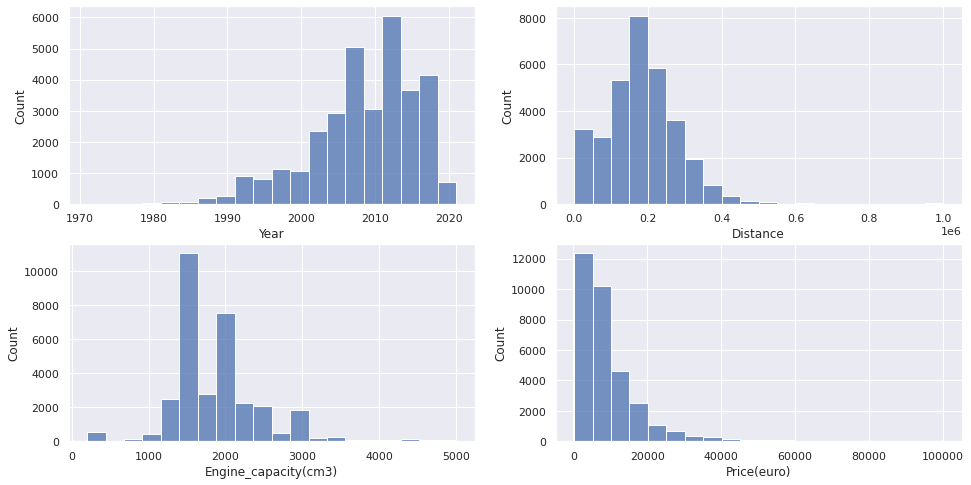

In [ ]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))


for idx, column_name in enumerate(num_columns):
    print(idx, column_name)
    plt.subplot(height,width, idx+1)
    sns.histplot(data=DF,
            x=column_name, bins = 20);

## Создание графиков

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1080 with 0 Axes>

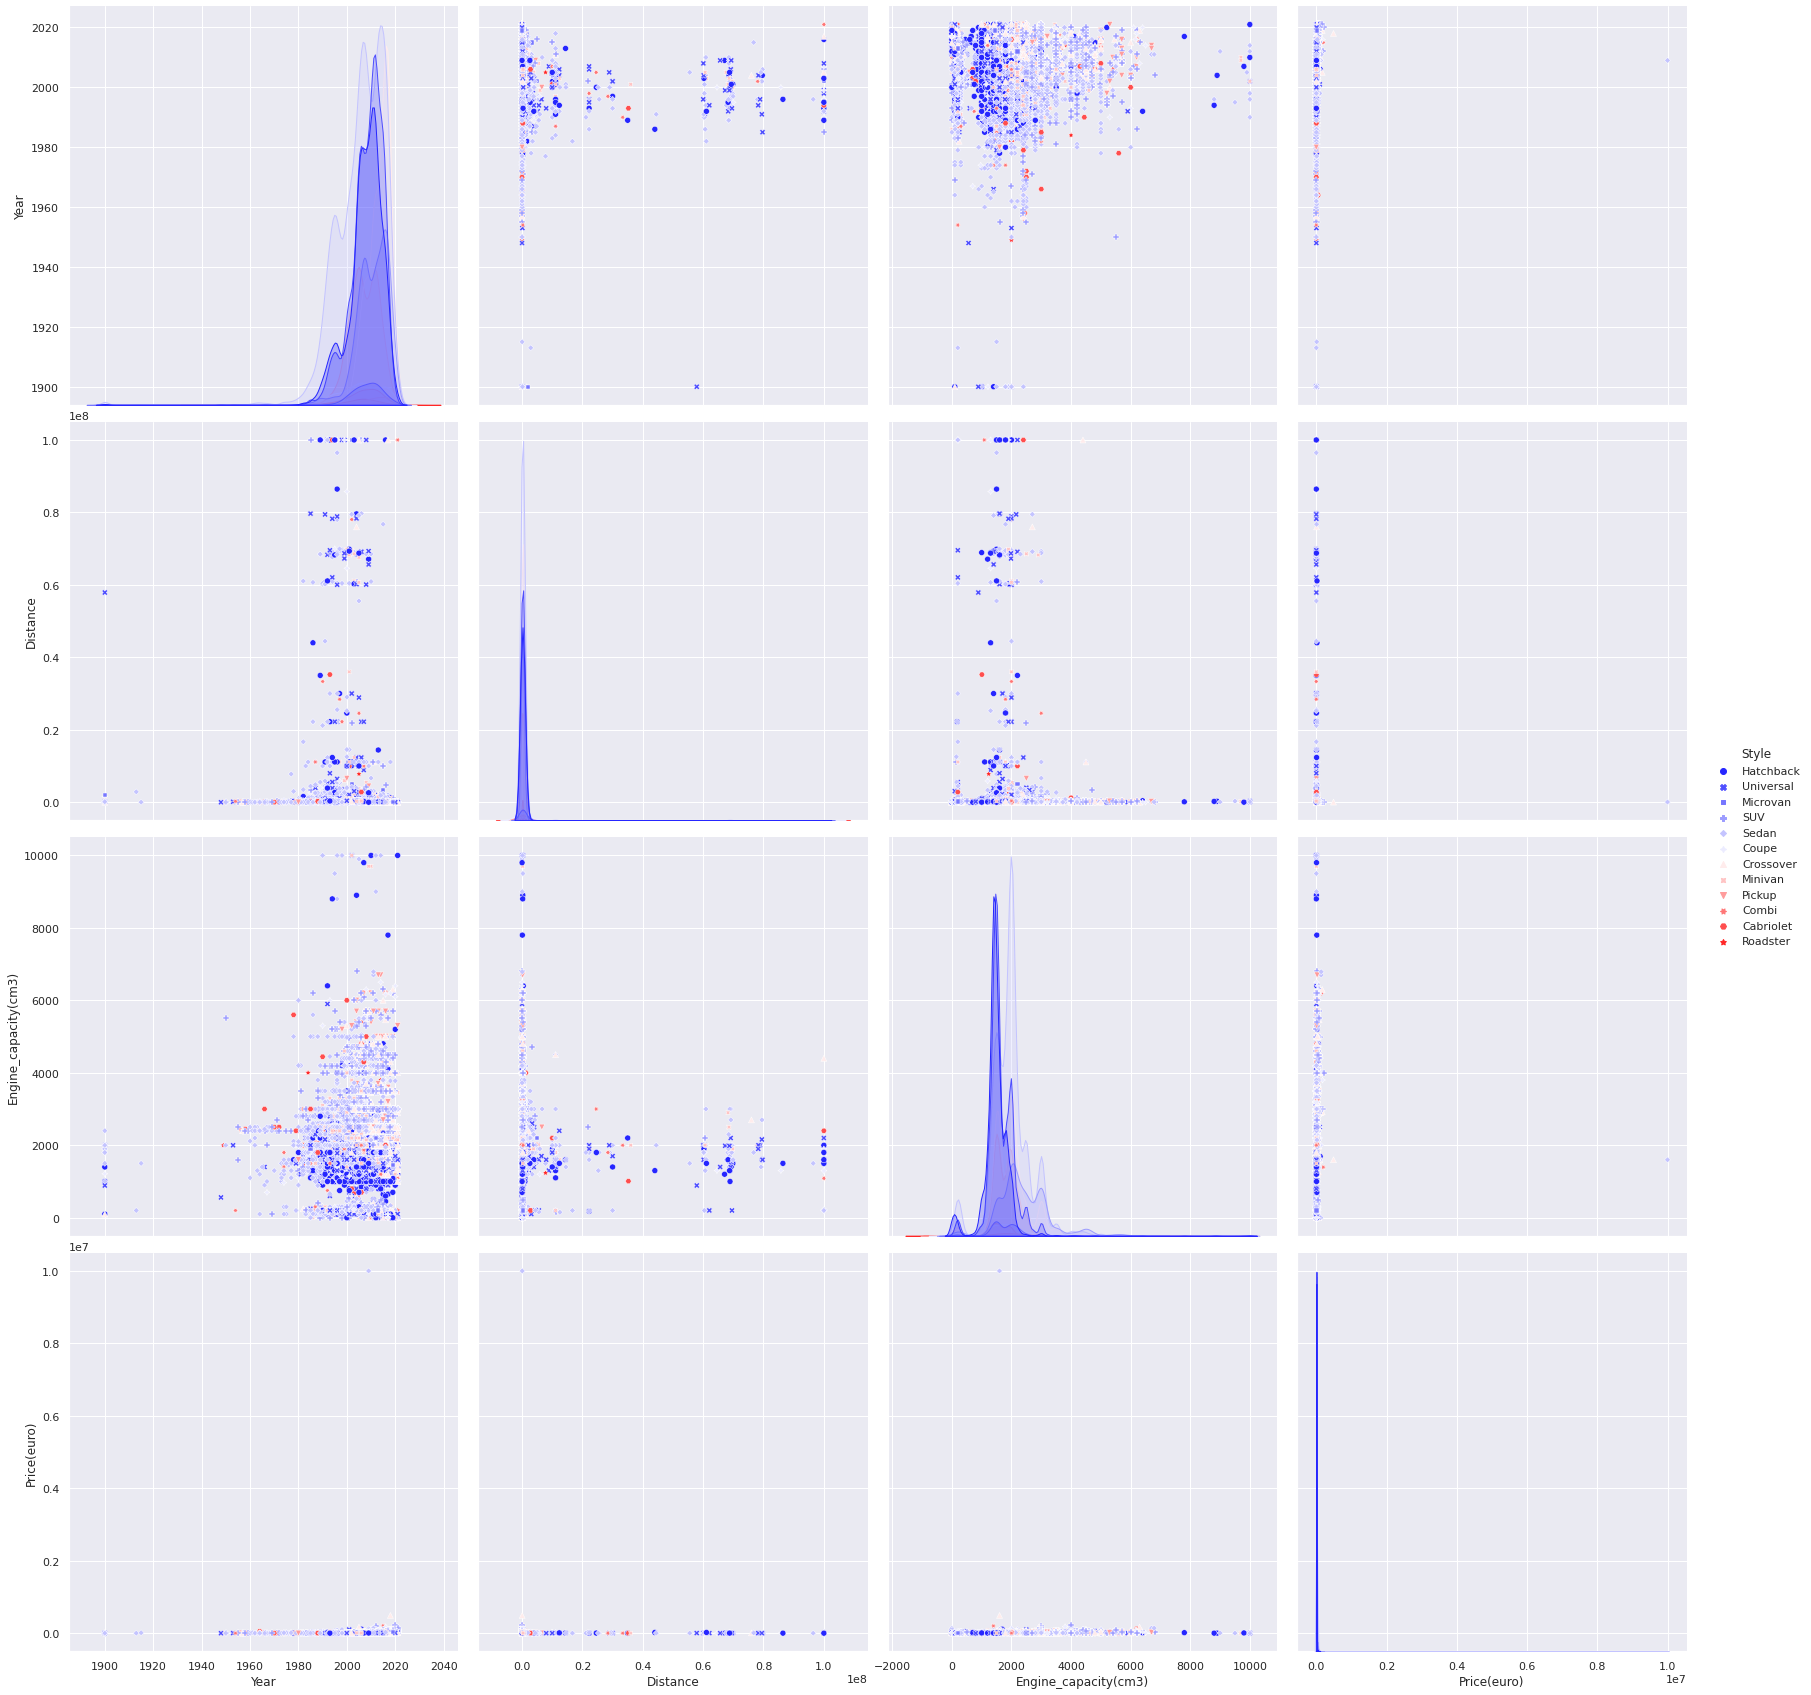

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df, 
             hue ='Style',
             markers = True,
             palette = 'bwr',
             size = 6);

## Создание 3D графика(год, цена, дистанция)

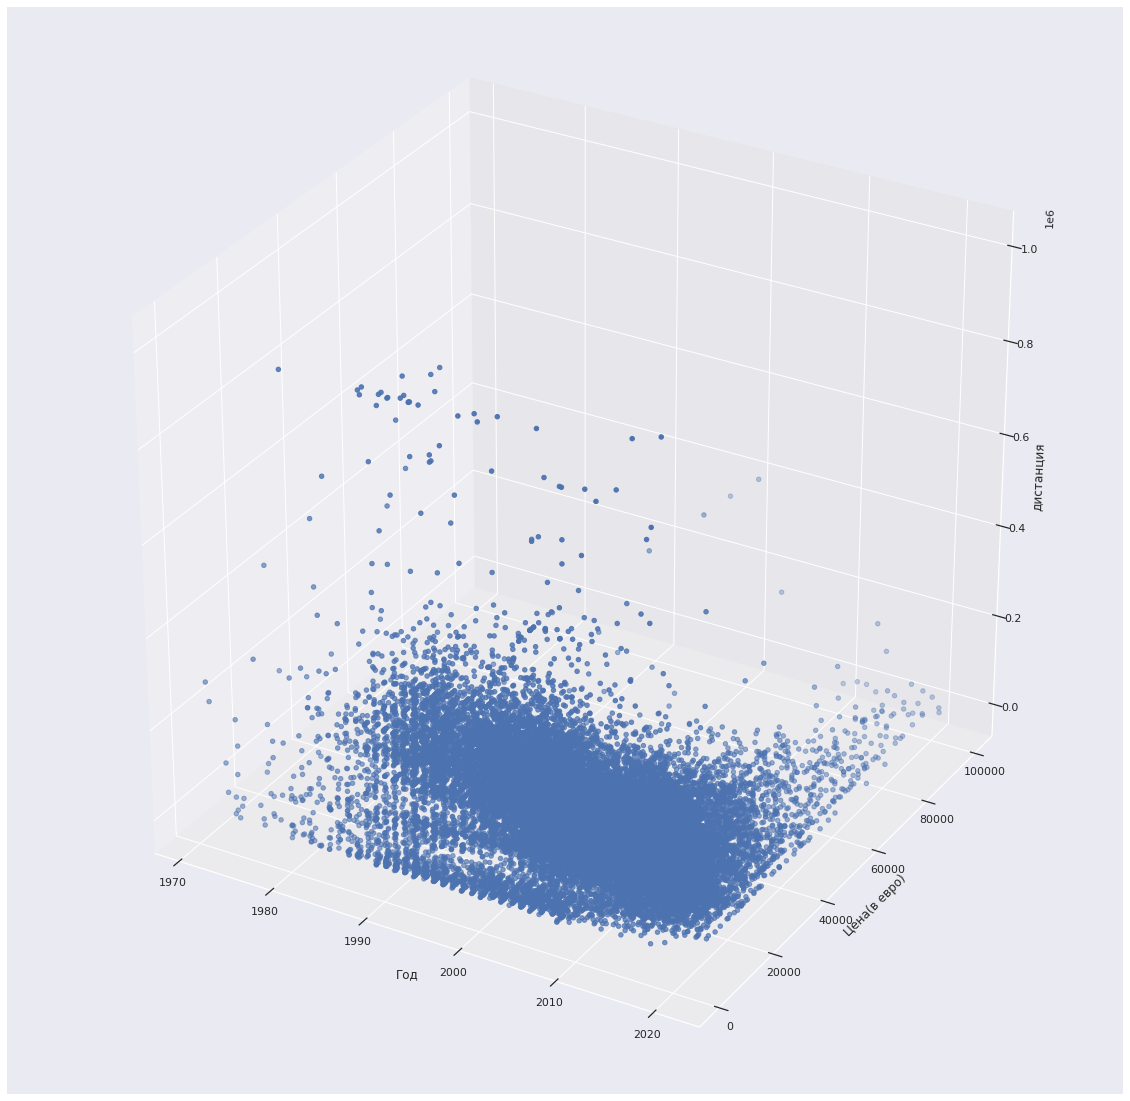

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d')

x = DF['Year']
y = DF['Price(euro)']
z = DF['Distance']

ax.set_xlabel("Год")
ax.set_ylabel("Цена(в евро)")
ax.set_zlabel("дистанция")

ax.scatter(x, y, z)
plt.show()

## Взял параметр hue в значении Model, чтобы посмотреть корреляцию с моделями

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2160x2160 with 0 Axes>

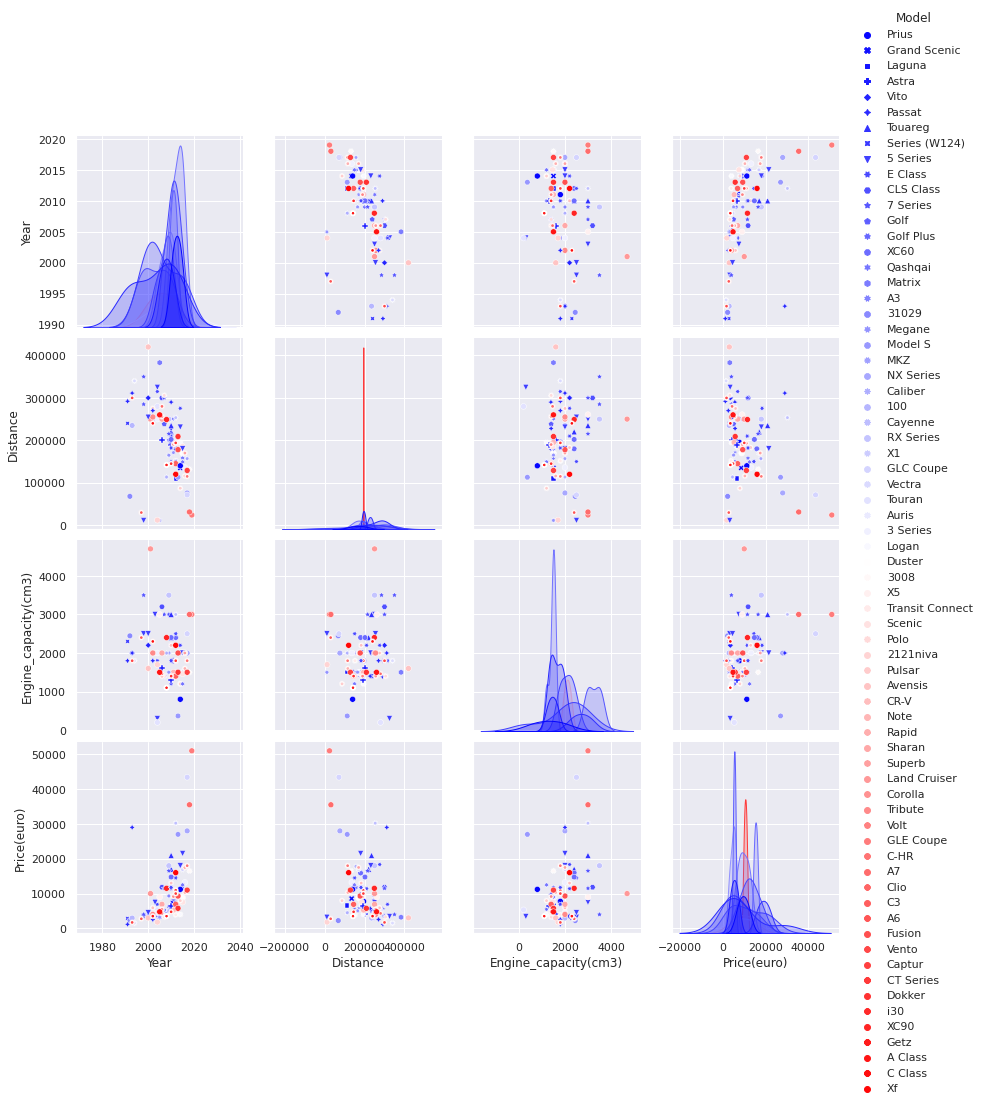

In [ ]:
fig = plt.figure(figsize=(30,30))
sns.pairplot(data = DF[:100], 
             hue = "Model",
             markers = True,
             palette = 'bwr',
             size = 3);

## Взял параметр hue в значении Fuel_type, чтобы посмотреть корреляцию с типом топлива

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2160x2160 with 0 Axes>

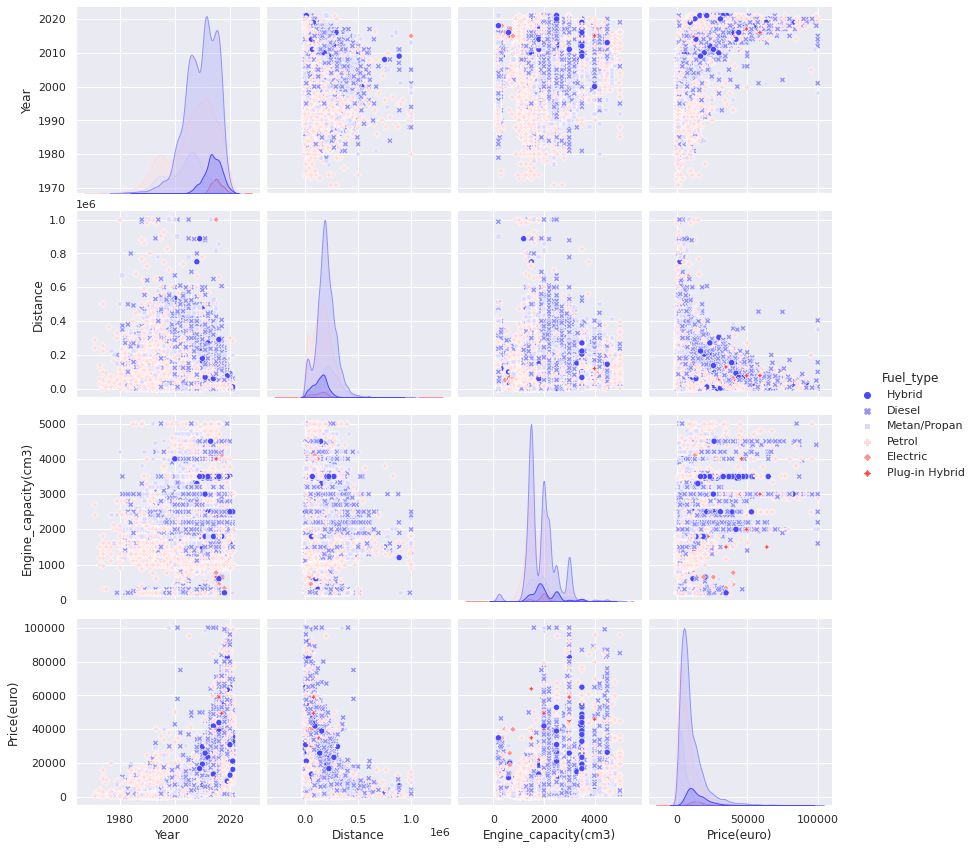

In [ ]:
fig = plt.figure(figsize=(30,30))
sns.pairplot(data = DF, 
             hue = "Fuel_type",
             markers = True,
             palette = 'bwr',
             size = 3);

#  Попытайтесь добавить в модель дополнительные признаки на основе имеющихся. Проверьте корреляцию новых признаков с добавленными признаками

## Cоздание параметров Age and km_year

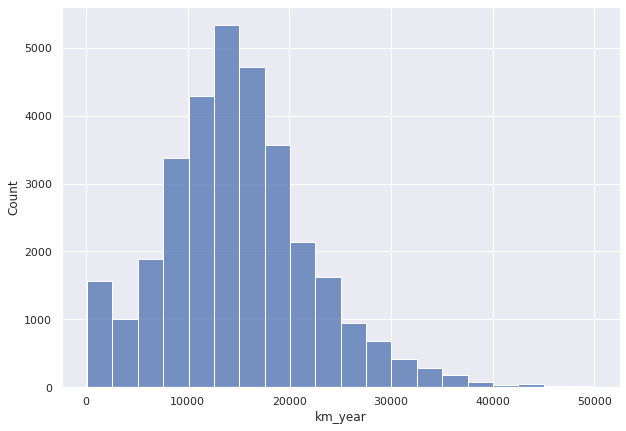

In [ ]:
DF['Age'] = 2022 - DF.Year

DF['km_year'] = DF.Distance/DF.Age
question_km_year = DF[DF.km_year > 50e3]
DF = DF.drop(question_km_year.index)
question_km_year = DF[DF.km_year < 100]
DF = DF.drop(question_km_year.index)
DF = DF.reset_index(drop=True)


plt.figure(figsize=(10,7))
sns.histplot(data=DF,
            x='km_year', bins = 20);

In [ ]:
DF

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32199  Volkswagen        Passat  2016      Sedan   88000.0   
32200  Land Rover    Freelander  2002  Crossover  225000.0   
32201       Dacia     Logan Mcv  2015  Universal   89000.0   
32202       Mazda             6  2006      Combi  370000.0   
32203     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  \
0                    1800.0        Hybrid    Automatic       7750.0   11   
1                    1500.0        Diesel       Manual       8550.0    8   
2                    1500.0        Diesel       Manual       6550.0   10   
3                    1600.0  Metan/Propan       Manual       4100.0   16   
4                    2200.0        Diesel       Manual       3490.0   22   
...                     ...           ...          ...          ...  ...   
32199                1800.0        Petrol    Automatic      11500.0    6   
32200                1800.0  Metan/Propan       Manual       4400.0   20   
32201                1500.0        Diesel       Manual       7000.0    7   
32202                2000.0        Diesel       Manual       4000.0   16   
32203                1500.0        Diesel       Manual       4000.0   16   

            km_year Mileage  
0      17727.272727  Middle  
1      16875.000000  Middle  
2      11000.000000     Low  
3      12500.000000  Middle  
4      13636.363636  Middle  
...             ...     ...  
32199  14666.666667  Middle  
32200  11250.000000     Low  
32201  12714.285714  Middle  
32202  23125.000000    High  
32203  18750.000000  Middle  

[32204 rows x 12 columns]

##Добавление параметра Mileage, который определяет степень пробега

In [16]:
range = []
for rangeName in DF.km_year:
  if (3000>rangeName>=100):
    range.append('Low')
  if(14000>rangeName>=3000):
    range.append("Middle")
  if(rangeName>=14000):
    range.append('High')
print(range)
print(DF.km_year.sum()/32204)
DF['Mileage'] = range
DF
print(DF['Price(euro)'].min())

['High', 'High', 'Middle', 'Middle', 'Middle', 'High', 'High', 'Middle', 'High', 'High', 'High', 'Middle', 'High', 'Middle', 'High', 'High', 'High', 'High', 'High', 'Low', 'High', 'Middle', 'High', 'High', 'High', 'Middle', 'Middle', 'High', 'High', 'High', 'High', 'High', 'Middle', 'High', 'High', 'High', 'High', 'High', 'High', 'Middle', 'High', 'High', 'High', 'Middle', 'Middle', 'High', 'High', 'High', 'Low', 'High', 'High', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Middle', 'High', 'Middle', 'High', 'High', 'High', 'Middle', 'High', 'High', 'High', 'High', 'High', 'Middle', 'High', 'Middle', 'High', 'Middle', 'Middle', 'High', 'Middle', 'Middle', 'High', 'High', 'High', 'Middle', 'High', 'High', 'Low', 'High', 'High', 'Middle', 'High', 'High', 'High', 'High', 'Middle', 'High', 'High', 'Middle', 'High', 'Middle', 'Middle', 'High', 'High', 'High', 'High', 'Middle', 'Middle', 'High', 'Middle', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'Middle', 'Hig

##Добавляю параметр Rare, который определяет или редкий дорогой или редкий дешевый или не редкий 

In [36]:
smartRedact = []

for step in DF.index:
  if((1990>DF.loc[step,"Year"]>1971) and (DF.loc[step,"Price(euro)"]<1000)):
    smartRedact.append('Rare cheap')
  elif((1990>DF.loc[step,"Year"]>1971) and (DF.loc[step,"Price(euro)"]>=1000)):
    smartRedact.append('Rare expensive')
  else:
    smartRedact.append('Not rare')
DF['Rare'] = smartRedact
DF[DF['Year']<1990]

Make          Model  Year      Style  Distance  \
170      Mercedes  Series (W123)  1984  Universal  100000.0   
465        Nissan          Sunny  1987  Universal  256987.0   
813          Ford         Taurus  1989      Sedan   45000.0   
866       Renault         Altele  1986  Universal  250000.0   
1236        Isuzu         Altele  1989        SUV  123456.0   
...           ...            ...   ...        ...       ...   
32072         GAZ           2410  1981      Sedan   24003.0   
32108         Vaz           2106  1989      Sedan   10000.0   
32116        Opel         Vectra  1989      Sedan  330000.0   
32122        Audi             80  1988  Cabriolet  250000.0   
32162  Volkswagen    Transporter  1980     Pickup   28866.0   

       Engine_capacity(cm3)     Fuel_type  Transmission  Price(euro)  Age  \
170                  2400.0        Diesel             0       1000.0   38   
465                  1700.0        Diesel             0        650.0   35   
813                  2300.0        Petrol             1       1200.0   33   
866                  1400.0        Petrol             0      13000.0   36   
1236                 2559.0        Petrol             0        950.0   33   
...                     ...           ...           ...          ...  ...   
32072                2400.0        Petrol             0      10000.0   41   
32108                1300.0        Petrol             0      12000.0   33   
32116                1400.0        Petrol             0       1100.0   33   
32122                1800.0  Metan/Propan             0       1300.0   34   
32162                1600.0        Petrol             0        500.0   42   

            km_year Mileage            Rare  
170     2631.578947     Low  Rare expensive  
465     7342.485714  Middle      Rare cheap  
813     1363.636364     Low  Rare expensive  
866     6944.444444  Middle  Rare expensive  
1236    3741.090909  Middle      Rare cheap  
...             ...     ...             ...  
32072    585.439024     Low  Rare expensive  
32108    303.030303     Low  Rare expensive  
32116  10000.000000  Middle  Rare expensive  
32122   7352.941176  Middle  Rare expensive  
32162    687.285714     Low      Rare cheap  

[489 rows x 13 columns]

##Проверка корреляции новых признаков Rare, Mileage

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2160x2160 with 0 Axes>

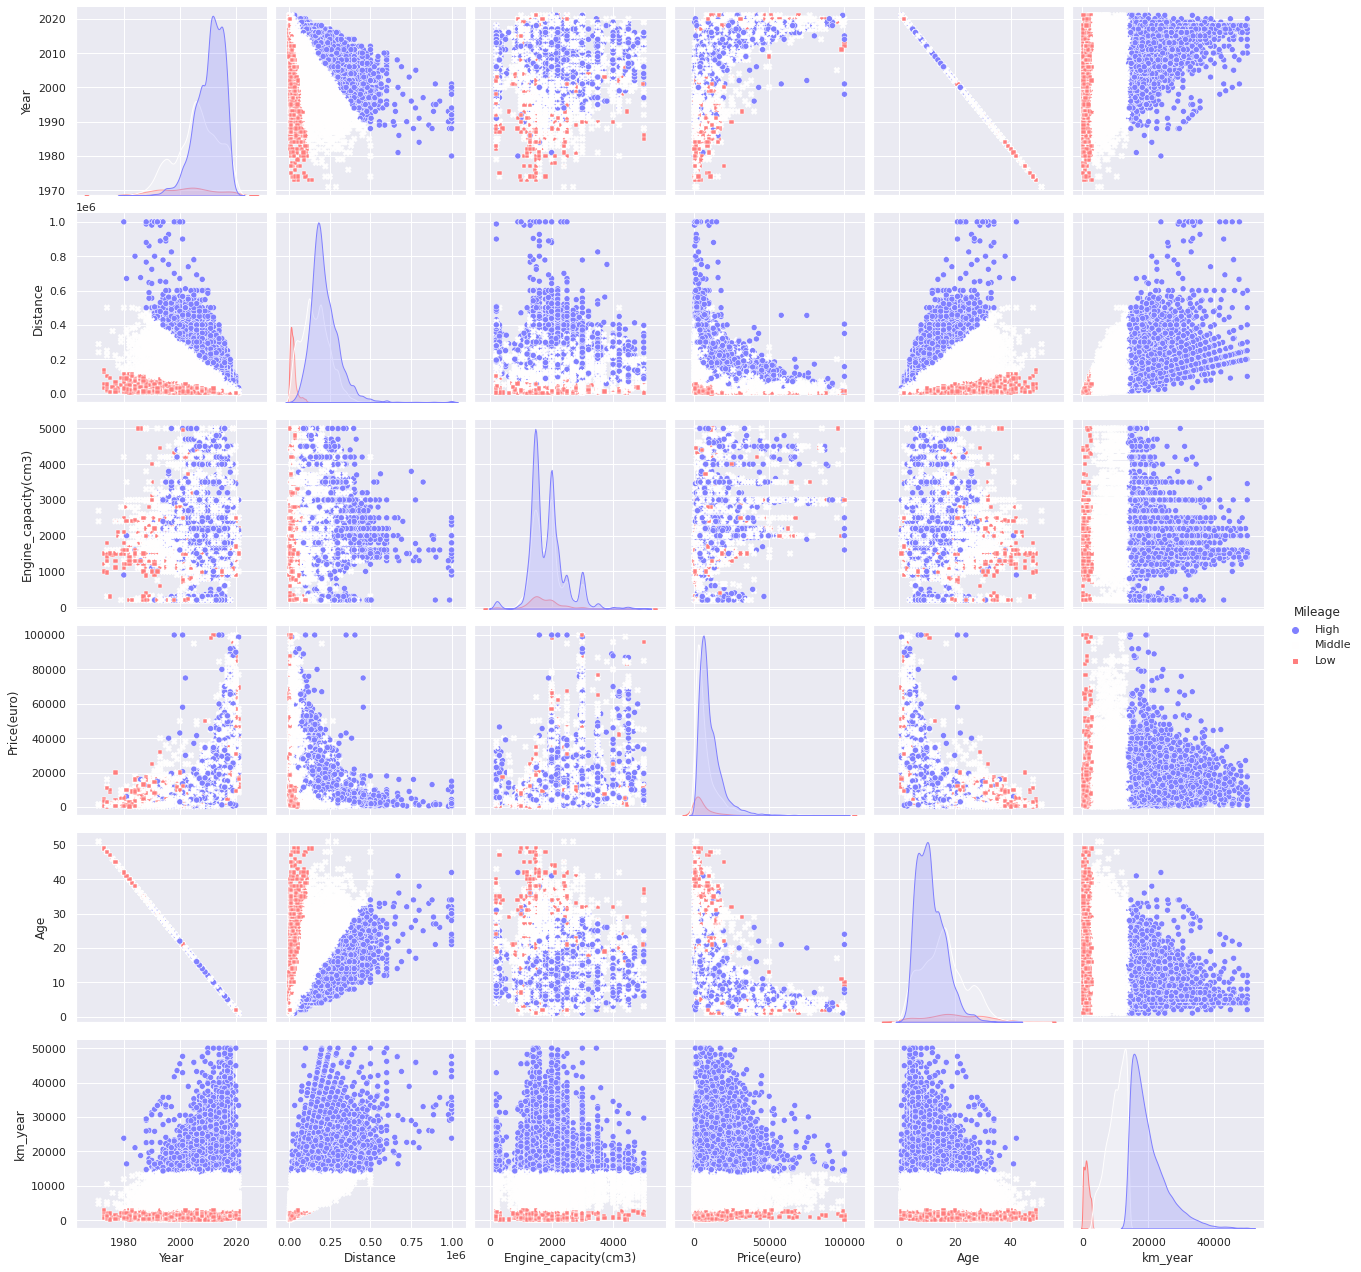

In [18]:
fig = plt.figure(figsize=(30,30))
sns.pairplot(data = DF, 
             hue = "Mileage",
             markers = True,
             palette = 'bwr',
             size = 3);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2160x2160 with 0 Axes>

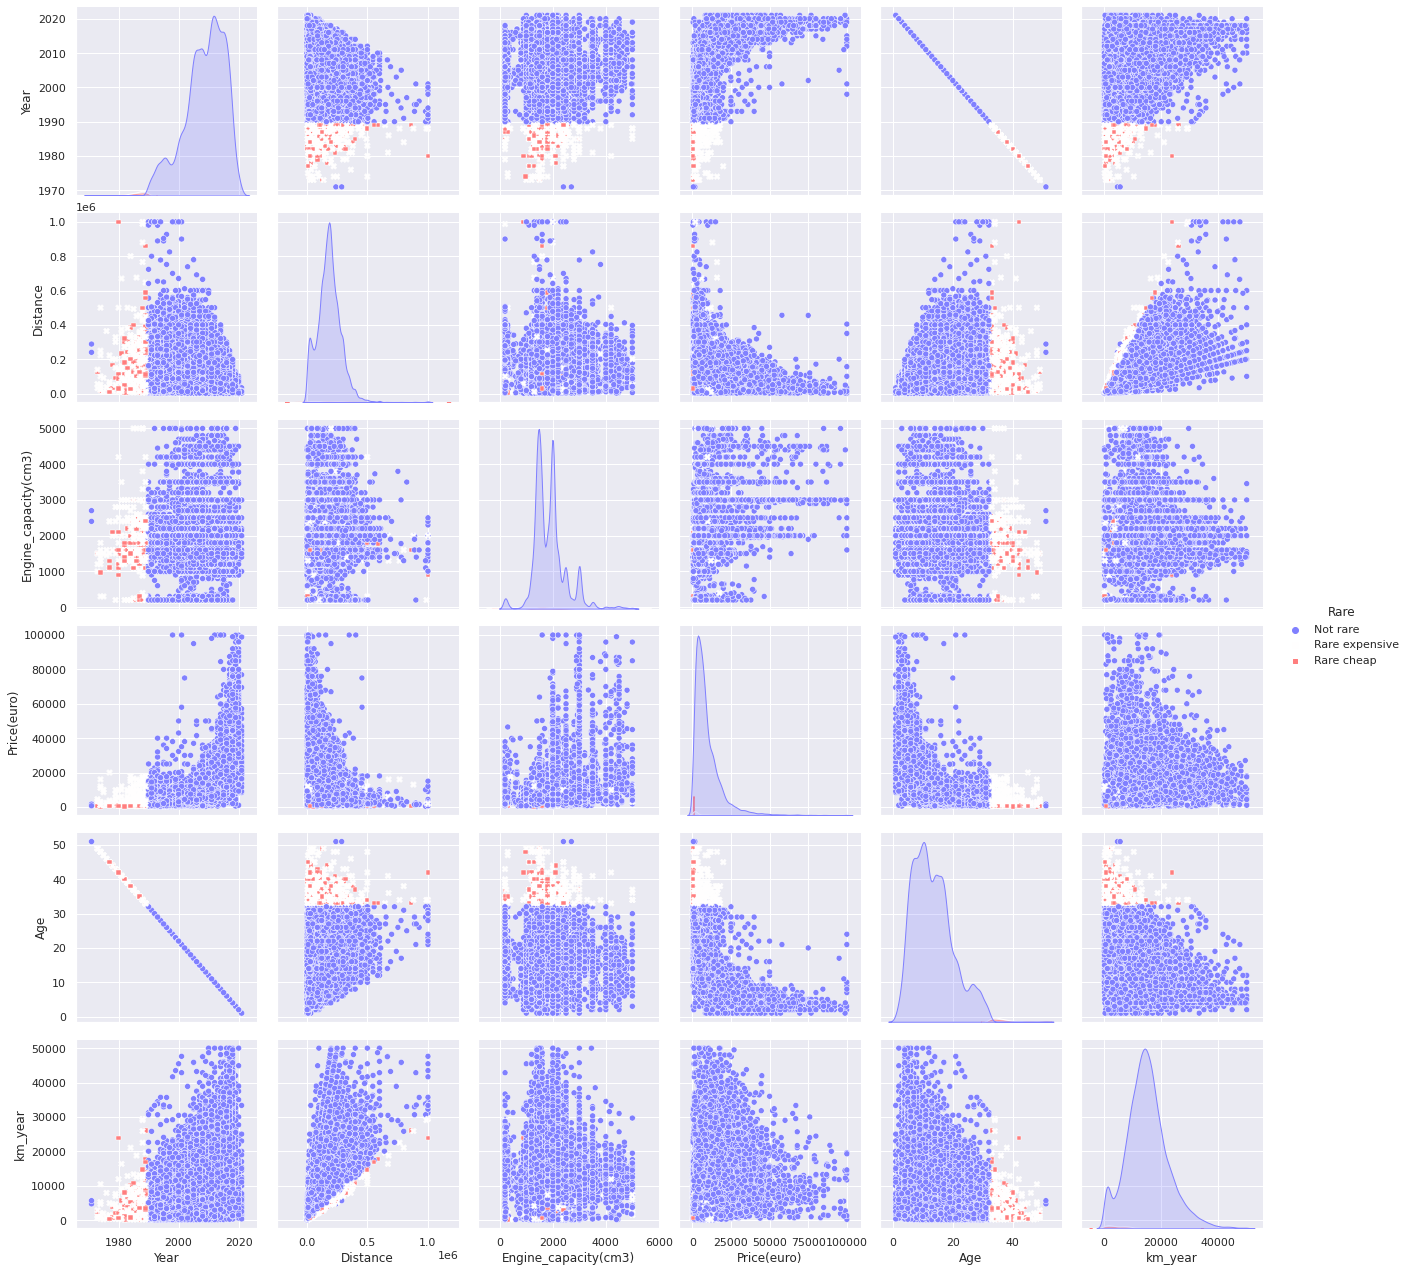

In [19]:
fig = plt.figure(figsize=(30,30))
sns.pairplot(data = DF, 
             hue = "Rare",
             markers = True,
             palette = 'bwr',
             size = 3);

# Выполните предварительную обработку данных. Сохраните результаты разных методов предварительной обработки в разные файлы, чтобы потом у вас была возможность протестировать различные гипотезы на моделях.

##Нормализация данных

In [20]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

DF_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

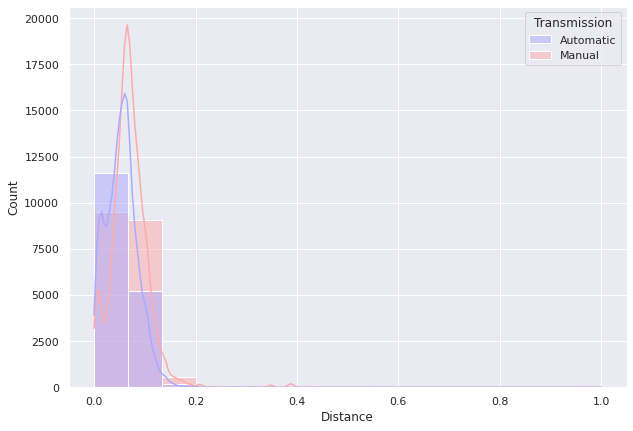

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_norm,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

##Стандартизация данных

In [21]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns]-M)/STD

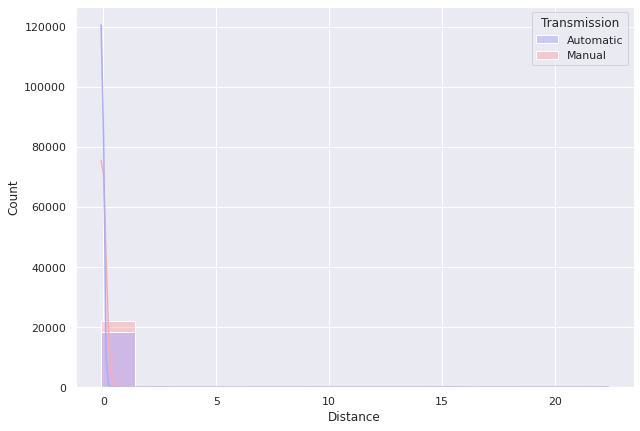

In [33]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_scaled,
             x = 'Distance', 
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

##Степенное преобразование

In [34]:
DF_power  = df.copy()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M)/STD

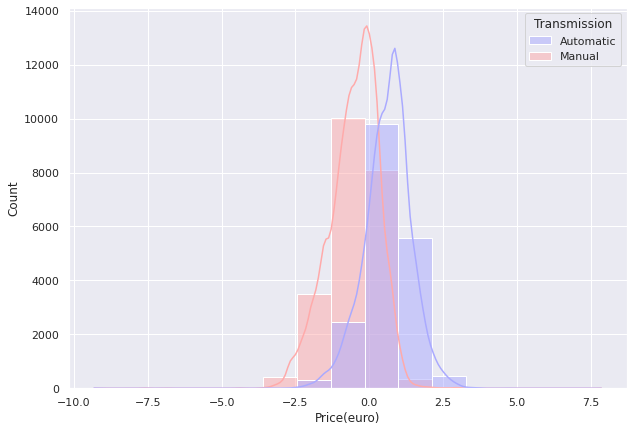

In [24]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = DF_power, 
             x = 'Price(euro)', 
             hue = 'Transmission', 
             bins = 15, kde = True,
             palette='bwr')

##Сохраняю в новый файл данные после преобразований 

In [25]:
DF.to_csv('/content/cars_moldova_clean.csv',index=False)

##Ordinal / One-Hot Encoding для категориальных

In [37]:
DF['Transmission'] = DF['Transmission'].map({'Automatic': 1, 'Manual': 0})

In [27]:
df_se = DF.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32204 entries, 0 to 32203
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32204 non-null  int8   
 1   Model                 32204 non-null  int16  
 2   Year                  32204 non-null  int64  
 3   Style                 32204 non-null  int8   
 4   Distance              32204 non-null  float64
 5   Engine_capacity(cm3)  32204 non-null  float64
 6   Fuel_type             32204 non-null  int8   
 7   Transmission          32204 non-null  int8   
 8   Price(euro)           32204 non-null  float64
 9   Age                   32204 non-null  int64  
 10  km_year               32204 non-null  float64
 11  Mileage               32204 non-null  object 
 12  Rare                  32204 non-null  object 
dtypes: float64(4), int16(1), int64(2), int8(4), object(2)
memory usage: 2.1+ MB


In [28]:
df_se.head()

Make  Model  Year  Style  Distance  Engine_capacity(cm3)  Fuel_type  \
0    71    535  2011      4  195000.0                1800.0          2   
1    58    359  2014     11  135000.0                1500.0          0   
2    58    419  2012     11  110000.0                1500.0          0   
3    53    137  2006     11  200000.0                1600.0          3   
4    47    725  2000      5  300000.0                2200.0          0   

   Transmission  Price(euro)  Age       km_year Mileage      Rare  
0             1       7750.0   11  17727.272727    High  Not rare  
1             0       8550.0    8  16875.000000    High  Not rare  
2             0       6550.0   10  11000.000000  Middle  Not rare  
3             0       4100.0   16  12500.000000  Middle  Not rare  
4             0       3490.0   22  13636.363636  Middle  Not rare

In [29]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()

Year  Distance  Engine_capacity(cm3)  Price(euro)  Make_ARO  \
41002  2015   89000.0                1500.0       7000.0         0   
41003  2009     225.0                1500.0       4500.0         0   
41004  2016   50000.0                1950.0      29500.0         0   
41005  2006  370000.0                2000.0       4000.0         0   
41006  2006  300000.0                1500.0       4000.0         0   

       Make_Abarth  Make_Acura  Make_Alfa Romeo  Make_Alta marca  \
41002            0           0                0                0   
41003            0           0                0                0   
41004            0           0                0                0   
41005            0           0                0                0   
41006            0           0                0                0   

       Make_Aston Martin  ...  Style_Sedan  Style_Universal  Fuel_type_Diesel  \
41002                  0  ...            0                1                 1   
41003                  0  ...            0                0                 1   
41004                  0  ...            1                0                 1   
41005                  0  ...            0                0                 1   
41006                  0  ...            0                0                 1   

       Fuel_type_Electric  Fuel_type_Hybrid  Fuel_type_Metan/Propan  \
41002                   0                 0                       0   
41003                   0                 0                       0   
41004                   0                 0                       0   
41005                   0                 0                       0   
41006                   0                 0                       0   

       Fuel_type_Petrol  Fuel_type_Plug-in Hybrid  Transmission_Automatic  \
41002                 0                         0                       0   
41003                 0                         0                       0   
41004                 0                         0                       1   
41005                 0                         0                       0   
41006                 0                         0                       0   

       Transmission_Manual  
41002                    1  
41003                    1  
41004                    0  
41005                    1  
41006                    1  

[5 rows x 940 columns]

In [30]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Columns: 940 entries, Year to Transmission_Manual
dtypes: float64(3), int64(1), uint8(936)
memory usage: 37.9 MB


In [31]:
df_se.to_csv('/content/cars_moldova_cat_num.csv',index=False)
df_ohe.to_csv('/content/cars_moldova_onehot.csv',index=False)